# Clustering
Clustering adalah proses pengelompokan objek menjadi sebuah kelompok yang anggotanya serupa dalam beberapa hal <br>
Clustering mempunyai beberapa karakteristik, yaitu: partitioning clustering, hierarchical clustering, overlapping clustering, dan hybrid.
<br>
## Ilustrasi Clustering
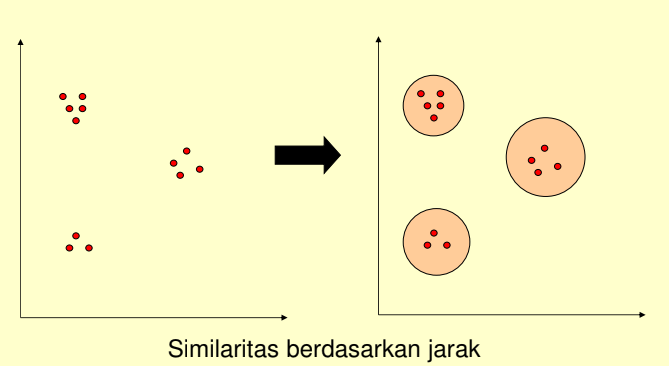

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

## Membaca Data

In [2]:
dataset = pd.read_csv("C:/Users/hangg/Downloads/Random Aslab/DSDA/Material/Produksi Bandeng Provinsi.csv", sep=";")

## Mengelompokkan data provinsi berdasarkan Volume Produksi

In [3]:
avg_vol = dataset.groupby("Provinsi")["Volume Produksi"].mean()

In [4]:
print('Rata-rata Volume Produksi Bandeng:\n', avg_vol)

Rata-rata Volume Produksi Bandeng:
 Provinsi
ACEH                           22184.470909
BALI                              99.979000
BANTEN                         12171.280000
BENGKULU                         243.381000
DAERAH ISTIMEWA YOGYAKARTA        10.702500
DKI JAKARTA                     1578.089091
GORONTALO                      10553.077273
JAMBI                            750.909091
JAWA BARAT                     91157.995455
JAWA TENGAH                    72597.519091
JAWA TIMUR                    136245.781818
KALIMANTAN BARAT                9123.312727
KALIMANTAN SELATAN             20515.524545
KALIMANTAN TENGAH              10786.175455
KALIMANTAN TIMUR               16554.790000
KALIMANTAN UTARA                2744.716667
KEPULAUAN BANGKA BELITUNG         22.164000
KEPULAUAN RIAU                    12.304444
LAMPUNG                         6750.873636
MALUKU                             4.999091
MALUKU UTARA                      64.565000
NUSA TENGGARA BARAT            

# Algoritma K-Means
Algoritma K-Means merupakan salah satu algoritma dengan partitional, karena K-Means didasarkan pada penentuan jumlah awal kelompok dengan mendefinisikan nilai centroid awalnya. <br> 
Algoritma K-Means termasuk ke dalam <b>Partitioning Clustering</b>, Pada partitioning clustering, setiap data harus termasuk pada cluster tertentu. Di samping itu, pada partitioning clustering, setiap data yang termasuk cluster tertentu pada suatu iterasi mempunyai kemungkinan berpindah kecluster lain pada iterasi berikutnya.
<br>
## Ilustrasi K-Means
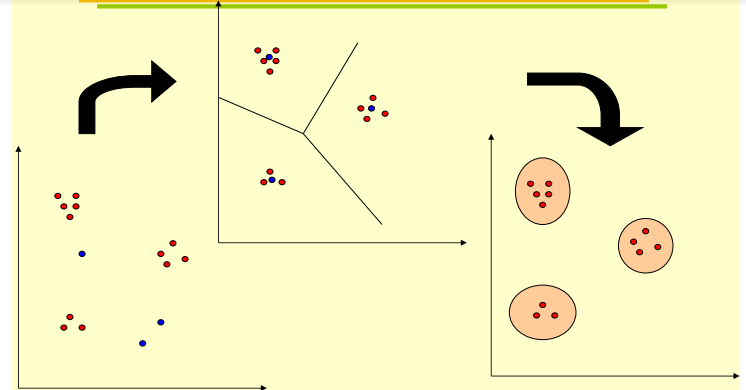
<br>
<b>=====================================================================================================</b> <br>
## Metode siku
Metode siku adalah metode yang digunakan untuk melihat nilai optimal cluster pada suatu data

In [5]:
distorsi = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(avg_vol.values.reshape(-1, 1))
    distorsi.append(kmeanModel.inertia_)

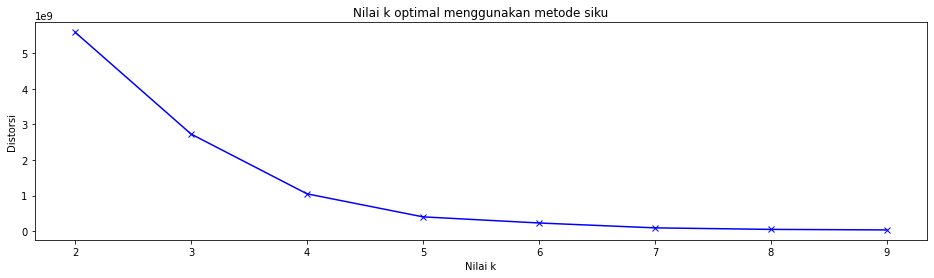

In [6]:
plt.figure(figsize=(16,4))
plt.plot(K, distorsi, 'bx-')
plt.xlabel('Nilai k')
plt.ylabel('Distorsi')
plt.title('Nilai k optimal menggunakan metode siku')
plt.show()

## Penjelasan metode siku di atas
Terlihat bahwa siku terbentuk di nilai k=4, jadi nilai optimal kluster pada data di atas adalah 4 <br>
<br>
<b>=====================================================================================================</b> <br>
Karena nilai optimal kluster = 4 maka parameter n_clusters pada fungsi KMeans dapat diisi dengan value 4

In [7]:
clustering = KMeans(n_clusters=4, init="random", n_init=1)
clusters=clustering.fit_predict(avg_vol.values.reshape(-1, 1))

In [8]:
print('\nHasil clustering:\n', clusters)


Hasil clustering:
 [2 1 0 1 1 1 0 1 3 3 3 0 2 0 0 1 1 1 0 1 1 0 1 1 1 1 0 3 0 2 1 1 0 1]


## Interpretasi hasil Clustering

In [9]:
avg_vol=pd.DataFrame({'Provinsi':avg_vol.index, 'Rata-Rata Vol':avg_vol.values, 'Cluster':clusters})

In [10]:
centroid_perdata=avg_vol.groupby('Cluster')['Rata-Rata Vol'].transform('mean')
centroid=np.unique(centroid_perdata)

In [11]:
sorted_centroid=np.sort(centroid)
Level4, Level3, Level2, Level1 = sorted_centroid[0], sorted_centroid[1], sorted_centroid[2], sorted_centroid[3]
category=centroid_perdata.map({Level4:'Level 4', Level3:'Level 3', Level2:'Level 2', Level1:'Level 1'})
avg_vol['Category']=category

In [12]:
print(avg_vol[["Provinsi", "Category"]])

                      Provinsi Category
0                         ACEH  Level 2
1                         BALI  Level 4
2                       BANTEN  Level 3
3                     BENGKULU  Level 4
4   DAERAH ISTIMEWA YOGYAKARTA  Level 4
5                  DKI JAKARTA  Level 4
6                    GORONTALO  Level 3
7                        JAMBI  Level 4
8                   JAWA BARAT  Level 1
9                  JAWA TENGAH  Level 1
10                  JAWA TIMUR  Level 1
11            KALIMANTAN BARAT  Level 3
12          KALIMANTAN SELATAN  Level 2
13           KALIMANTAN TENGAH  Level 3
14            KALIMANTAN TIMUR  Level 3
15            KALIMANTAN UTARA  Level 4
16   KEPULAUAN BANGKA BELITUNG  Level 4
17              KEPULAUAN RIAU  Level 4
18                     LAMPUNG  Level 3
19                      MALUKU  Level 4
20                MALUKU UTARA  Level 4
21         NUSA TENGGARA BARAT  Level 3
22         NUSA TENGGARA TIMUR  Level 4
23                       PAPUA  Level 4


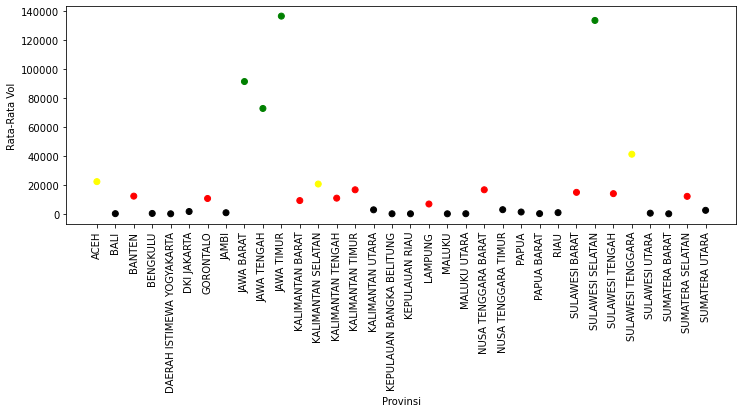

In [13]:
x=avg_vol.index
y=avg_vol['Rata-Rata Vol']
colors={'Level 4':'black', 'Level 3':'red', 'Level 2':'yellow', 'Level 1':'green'}
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x, y, c=avg_vol['Category'].apply(lambda x:colors[x]))
plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata Vol')
plt.xticks(x, avg_vol['Provinsi'], rotation=90)
plt.show()

Terlihat bahwa hasil clustering menunjukkan adanya 4 klaster dalam 1 dataset yang dimana <br>
Klaster level 1 terdiri dari 4 provinsi yaitu Jawa Barat, Jawa Tengah, Jawa Timur, Sulawesi Selatan (Ditandai dengan warna hijau)<br>
Klaster level 2 terdiri dari 3 provinsi yaitu Aceh, Kalimantan Selatan, Sulawesi Tenggara (Ditandai dengan warna kuning)<br>
Klaster level 3 terdiri dari 10 provinsi yaitu Banten, Gorontalo, dan lainnya (Ditandai dengan warna merah)<br>
Klaster level 4 terdiri dari 17 provinsi Bali, Bengkulu, dan lainnya (Ditandai dengan warna hitam)<br>
<table>
    <tr>
        <th><center>Level</center></th>
        <th><center>Penjelasan</center></th>
    </tr>
    <tr>
        <td><center>1</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng terbanyak di Indonesia</td>
    </tr>
    <tr>
        <td><center>2</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng terbanyak ke-2 di Indonesia</td>
    </tr>
    <tr>
        <td><center>3</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng terbanyak ke-3 di Indonesia</td>
    </tr>
    <tr>
        <td><center>4</center></td>
        <td>Klaster Provinsi pemroduksi Ikan Bandeng tersedikit di Indonesia</td>
    </tr>
</table>